In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import pymongo
import pprint
from pymongo import MongoClient
import datetime as dt
from operator import attrgetter
%matplotlib inline

In [2]:
client = MongoClient('mongodb://localhost:27017')
db = client.yelp
con_check = str(db)
if con_check.find('yelp') != int(-1):
    print('...Connected')
else:
    print('...Connection Failed')

...Connected


In [3]:
all_reviews = list(db.review.find({},{"date":1, "user_id":1, "stars":1}).limit(50000))  

In [40]:
all_reviews_df = pd.DataFrame(all_reviews)
all_reviews = []

In [41]:
all_reviews_df.head(2)

,_id,date,stars,user_id
0,57712bd37b99e7221552752f,2012-08-01,4,PUFPaY9KxDAcGqfsorJp3Q
1,57712bd37b99e72215527530,2015-10-31,5,auESFwWvW42h6alXgFxAXQ


In [42]:
dates = list(all_reviews_df.date)
all_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
dates = []

In [43]:
months= list()
mcount = min(all_dates)  

monthly_reviews_list = list()
monthly_stars_avg_list = list()

while mcount <= max(all_dates):
    months.append(mcount)
    mcount = mcount + 4 * dt.timedelta(7)

for month in months:
    monthly_review_count = 0.0
    monthly_stars_sum = 0.0
    monthly_stars_avg = 0.0
    date_index = 0

    for date in all_reviews_df.date :
        date = dt.datetime.strptime(date,'%Y-%m-%d').date()
        
        if date >= month and date <= month + 4 * dt.timedelta(6):
            monthly_review_count = 1 + monthly_review_count
            monthly_stars_sum = monthly_stars_sum + all_reviews_df.stars[date_index]
            monthly_stars_avg = monthly_stars_sum / monthly_review_count

        date_index = date_index + 1
        
    monthly_reviews_list.append(monthly_review_count)
    monthly_stars_avg_list.append(monthly_stars_avg)

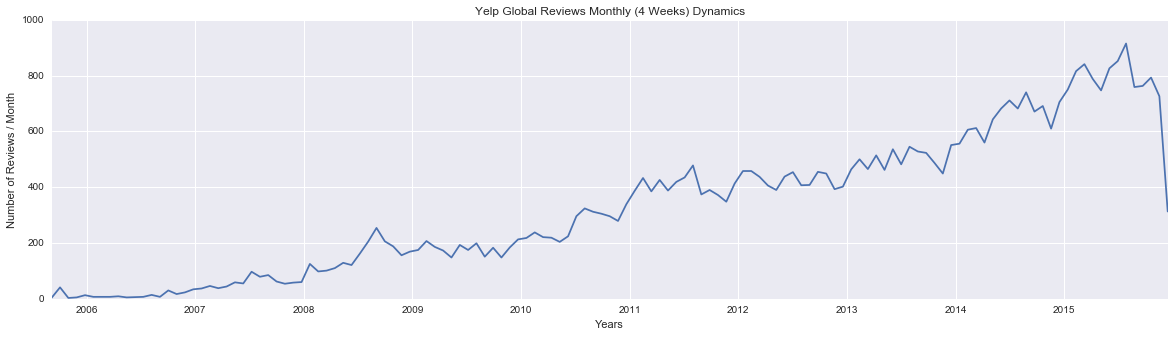

In [44]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(months, monthly_reviews_list,alpha=1)
ax.set_title('Yelp Global Reviews Monthly (4 Weeks) Dynamics')
ax.set_xlabel('Years')
ax.set_ylabel('Number of Reviews / Month')


In [4]:
business_data = list(db.business.find())

In [5]:
business_df = pd.DataFrame(business_data)
business_data = []
business_df.head(2)

,_id,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,57712b737b99e72215506d99,"{'Accepts Credit Cards': True, 'Good for Kids'...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Thursday': {'open': '11:00', 'close': '21:00...",40.354327,-79.900706,Mr Hoagie,[],True,4,4.5,PA,business
1,57712b737b99e72215506d9a,{},3eu6MEFlq2Dg7bQh8QbdOg,"[Auto Repair, Automotive]",Dravosburg,"1 Ravine St\nDravosburg, PA 15034",{},40.350956,-79.889059,Joe Cislo's Auto,[],True,3,5.0,PA,business


In [6]:
cities = business_df.groupby('city').size().sort_values()
cities

city
Île des Soeurs            1
Peoria                    1
Fort mill                 1
Penicuik                  1
Ft. Mill                  1
Oregon                    1
Old Scottsdale            1
Gilbert, AZ               1
Glasgow                   1
Phoenix                   1
Old Montreal              1
Glibert                   1
North Scottsdale          1
Golden Square Mile        1
Goldfield                 1
Grand Canyon              1
Green Tree                1
Green Valley              1
North Las Vegas           1
Glendale Az               1
North Carolina            1
Fort Kinnaird             1
Phoenix Metro Area        1
Regent Square             1
Ratho                     1
MMRP                      1
Eagan                     1
East Liberty              1
Pointe Claire             1
Pittsburrgh               1
                      ...  
Kitchener               188
Laval                   196
Middleton               208
Cave Creek              229
Fort Mill      